# Import Data

STEP 1 - Load necessary packages

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
import ast
from google.colab import drive
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
plt.style.use('fivethirtyeight')
%matplotlib inline
import plotly as plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

import folium
import folium.plugins
from branca.element import Template, MacroElement

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, brier_score_loss, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz, DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# To display full output in Notebook, instead of only the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

STEP 2 - Select relavant columns

In [ ]:
usecols = ["name",
             #'description'
             #"neighborhood_overview",
             "host_id",
             "host_name",
             "host_since",
             "host_response_rate",
             "host_response_time",
             "host_acceptance_rate",
             "host_is_superhost",
             #"host_neighbourhood",
             #"host_listings_count",
             #"host_total_listings_count",
             "host_verifications",
             "host_has_profile_pic",
             "host_identity_verified",
             "neighbourhood",
             #"neighbourhood_cleansed",
             "neighbourhood_group_cleansed",
             "latitude",
             "longitude",
             "room_type",
             "accommodates",
             "bathrooms",
             "bathrooms_text",
             "bedrooms",
             "beds",
             #"amenities",
             "price",
             "minimum_nights",
             "maximum_nights",
             "has_availability",
             "availability_30",
             "availability_60",
             "availability_90",
             "availability_365",
             "number_of_reviews",
             "number_of_reviews_ltm",
             "number_of_reviews_l30d",
             "review_scores_rating",
             "review_scores_accuracy",
             "review_scores_cleanliness",
             "review_scores_checkin",
             "review_scores_communication",
             "review_scores_location",
             "review_scores_value",
             "instant_bookable",
             "calculated_host_listings_count",
             "calculated_host_listings_count_entire_homes",
             "calculated_host_listings_count_private_rooms",
             "calculated_host_listings_count_shared_rooms",
             "reviews_per_month"]

STEP 3 - Import csv file

In [ ]:
listings = pd.read_csv('/content/listings2.csv', usecols=usecols)

listings

,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,Lovely room 2 windows tv work desk ac included,3013025,Suada,2012-07-21,NaN,NaN,NaN,f,['phone'],t,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,Room by Sunny & Bay! Sunset Park & Bay Ridge,358089614,Joshua,2020-07-23,within an hour,100%,94%,t,"['email', 'phone']",t,...,5.00,4.83,4.67,4.67,t,2,0,2,0,0.21
2,Private Room in Luxury Apartment,39162543,Jeff,2015-07-21,within an hour,100%,77%,f,"['email', 'phone']",t,...,NaN,NaN,NaN,NaN,f,3,2,1,0,NaN
3,Modern renovated huge apartment,148571080,David,2017-08-31,a few days or more,0%,0%,f,"['email', 'phone']",t,...,NaN,NaN,NaN,NaN,f,5,5,0,0,NaN
4,Summertime Park Slope townhouse,394869975,Betty,2021-03-30,within a day,78%,33%,f,"['email', 'phone']",t,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37536,basement#4,424334449,Marcelo,2021-09-23,within an hour,100%,98%,NaN,"['email', 'phone']",t,...,3.80,4.20,3.80,3.80,t,6,0,6,0,0.38
37537,Modern 3 Bed 2 Bath Home With Parking | 2 min LGA,491695460,Prince,2022-12-16,within an hour,100%,96%,t,"['email', 'phone']",t,...,4.85,4.89,4.78,4.77,f,1,1,0,0,4.97
37538,Home away from Home,347560493,Natalie,2020-05-25,within an hour,92%,99%,f,"['email', 'phone']",t,...,4.58,4.60,4.40,4.30,f,4,0,4,0,1.22
37539,"Traveling Nurses Utilities, Driveway, Washer/D...",127112667,Rebecca,2017-04-22,NaN,NaN,NaN,f,"['email', 'phone']",t,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


STEP 4 - Check variable type and info

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37541 entries, 0 to 37540
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          37539 non-null  object 
 1   host_id                                       37541 non-null  int64  
 2   host_name                                     37536 non-null  object 
 3   host_since                                    37536 non-null  object 
 4   host_response_time                            22644 non-null  object 
 5   host_response_rate                            22644 non-null  object 
 6   host_acceptance_rate                          23230 non-null  object 
 7   host_is_superhost                             37112 non-null  object 
 8   host_verifications                            37536 non-null  object 
 9   host_has_profile_pic                          37536 non-null 

STEP 5 - Check Duplications

In [ ]:
duplicate_rows = listings[listings.duplicated()]
duplicate_rows.sort_values(['name'])

,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
15233,1-Bedroom Hotel Suite - 1 bed,326084746,Suiteness,2020-01-10,within an hour,100%,85%,f,"['email', 'phone', 'work_email']",t,...,NaN,NaN,NaN,NaN,t,70,0,70,0,NaN
15228,1-Bedroom Hotel Suite - 1 bed,326084746,Suiteness,2020-01-10,within an hour,100%,85%,f,"['email', 'phone', 'work_email']",t,...,NaN,NaN,NaN,NaN,t,70,0,70,0,NaN
16859,1-Bedroom Hotel Suite - 1 bed,326084746,Suiteness,2020-01-10,within an hour,100%,85%,f,"['email', 'phone', 'work_email']",t,...,NaN,NaN,NaN,NaN,t,70,0,70,0,NaN
15030,1-Bedroom Hotel Suite - 2 beds,326084746,Suiteness,2020-01-10,within an hour,100%,85%,f,"['email', 'phone', 'work_email']",t,...,NaN,NaN,NaN,NaN,t,70,0,70,0,NaN
37037,1-Bedroom Hotel Suite - 2 beds,326084746,Suiteness,2020-01-10,within an hour,100%,85%,f,"['email', 'phone', 'work_email']",t,...,NaN,NaN,NaN,NaN,t,70,0,70,0,NaN
12768,"Blueground | FiDi, gym, nr Freedom Tower",107434423,Blueground,2016-12-16,within an hour,100%,96%,f,"['email', 'phone', 'work_email']",t,...,NaN,NaN,NaN,NaN,t,876,876,0,0,NaN
14805,King Room - 1 bed,326084746,Suiteness,2020-01-10,within an hour,100%,85%,f,"['email', 'phone', 'work_email']",t,...,NaN,NaN,NaN,NaN,t,70,0,70,0,NaN
16692,King Room - 1 bed,326084746,Suiteness,2020-01-10,within an hour,100%,85%,f,"['email', 'phone', 'work_email']",t,...,NaN,NaN,NaN,NaN,t,70,0,70,0,NaN
15237,King Room - 1 bed,326084746,Suiteness,2020-01-10,within an hour,100%,85%,f,"['email', 'phone', 'work_email']",t,...,NaN,NaN,NaN,NaN,t,70,0,70,0,NaN
15238,King Room - 1 bed,326084746,Suiteness,2020-01-10,within an hour,100%,85%,f,"['email', 'phone', 'work_email']",t,...,NaN,NaN,NaN,NaN,t,70,0,70,0,NaN


In [ ]:
listings = listings.drop_duplicates()

In [ ]:
listings.isna().sum() ##EDA 1 : finding total missing numbers in the dataset

,0
name,2
host_id,0
host_name,5
host_since,5
host_response_time,14896
host_response_rate,14896
host_acceptance_rate,14310
host_is_superhost,429
host_verifications,5
host_has_profile_pic,5


The dataset contains missing data across various columns, requiring thoughtful preprocessing to ensure accuracy and usability for analysis. Certain columns, such as `host_response_time`, `host_response_rate`, and `host_acceptance_rate`, exhibit substantial missing values, with over 14,000 entries absent. These variables are critical for understanding host behavior and response patterns, so careful consideration is needed to address these gaps. Possible approaches include imputation using the median or mode, though these columns may be dropped if deemed non-essential for the analysis. Similarly, columns such as `bathrooms`, `price`, and `beds` also have a high proportion of missing values, warranting similar treatment.

Moderately affected columns, such as the `review_scores_*` variables and `reviews_per_month`, with approximately 11,540 missing entries, are significant for assessing host and listing quality. Imputing these values using predictive models or mean values could preserve their utility. For columns with minimal missing values, like `host_is_superhost`, `bedrooms`, and `host_identity_verified`, straightforward imputation using the mode or median is appropriate to ensure completeness without substantial data loss.  

Finally, certain columns, such as `latitude`, `longitude`, `room_type`, `availability_*`, and `number_of_reviews`, have no missing data, making them readily available for analysis without additional preprocessing. Overall, the treatment strategy for missing values will involve a combination of targeted imputation and, where necessary, the exclusion of rows or columns. This approach ensures the dataset remains robust and reliable for subsequent machine learning tasks.

# Data Cleansing

STEP 1 - Fixing Data Types

In [ ]:
def convert_column_to_type(df, column_name, data_type):
    """
    Convert a specified column in a DataFrame to a specified data type.

    :param df: pandas DataFrame containing the data
    :param column_name: column to convert to the specified data type
    :param data_type: desired data type ('date', 'int', 'float')
    :return: DataFrame with the converted column
    """
    try:
        if data_type == 'date':
            df[column_name] = pd.to_datetime(df[column_name], errors='coerce')
        elif data_type == 'int':
            df[column_name] = pd.to_numeric(df[column_name], errors='coerce', downcast='integer')
        elif data_type == 'float':
            df[column_name] = pd.to_numeric(df[column_name], errors='coerce', downcast='float')
        else:
            raise ValueError("Invalid data type specified. Use 'date', 'int', or 'float'.")
    except Exception as e:
        print(f"Error converting column {column_name} to {data_type}: {e}")
    return df[column_name].head()

convert_column_to_type(listings, 'host_since', 'date')

<ipython-input-9-012a96dd0f7e>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,host_since
0,2012-07-21
1,2020-07-23
2,2015-07-21
3,2017-08-31
4,2021-03-30


STEP 2 - Turning % sign to decimal

In [ ]:
def convert_percentage_to_decimal(df, column_name):
    """
    Convert a specified column in a DataFrame from percentage strings to decimal format.

    :param df: pandas DataFrame containing the data
    :param column_name: column to convert from percentage to decimal
    :return: DataFrame with the converted column
    """
    try:
        df[column_name] = df[column_name].str.replace('%', '', regex=False).astype(float) / 100
    except Exception as e:
        print(f"Error converting column {column_name}: {e}")
    return df[column_name].head()

convert_percentage_to_decimal(listings,'host_response_rate')
convert_percentage_to_decimal(listings,'host_acceptance_rate')

<ipython-input-10-2a33a5d3af6e>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,host_response_rate
0,NaN
1,1.00
2,1.00
3,0.00
4,0.78


<ipython-input-10-2a33a5d3af6e>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,host_acceptance_rate
0,NaN
1,0.94
2,0.77
3,0.00
4,0.33


STEP 3 - Remove dollar sign '$' in front of price variable

In [ ]:
listings['price'] = listings['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

<ipython-input-11-d2dba8e1eed8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



STEP 4 - Turning boolean value to binary variable (0,1)

In [ ]:
def convert_tf_to_binary(df, column_name):
    """
    Convert a specified column in a DataFrame from 't'/'f' to 1/0.

    :param df: pandas DataFrame containing the data
    :param column_name: column to convert from 't'/'f' to 1/0
    :return: DataFrame with the converted column
    """
    try:
        df[column_name] = df[column_name].map({'t': 1, 'f': 0})
    except Exception as e:
        print(f"Error converting column {column_name}: {e}")
    return df[column_name].head()

convert_tf_to_binary(listings,'host_is_superhost')
convert_tf_to_binary(listings,'host_has_profile_pic')
convert_tf_to_binary(listings,'host_identity_verified')
convert_tf_to_binary(listings,'has_availability')
convert_tf_to_binary(listings,'instant_bookable')

<ipython-input-12-aee9f9a51d97>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,host_is_superhost
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0


<ipython-input-12-aee9f9a51d97>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,host_has_profile_pic
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


<ipython-input-12-aee9f9a51d97>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,host_identity_verified
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0


<ipython-input-12-aee9f9a51d97>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,has_availability
0,1.0
1,1.0
2,1.0
3,NaN
4,1.0


<ipython-input-12-aee9f9a51d97>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,instant_bookable
0,0
1,1
2,0
3,0
4,0


STEP 5 - Turning 'Neighborhood highlights' into 1 and 0 otherwise for values in variable 'Neighbourhood'

In [ ]:
# Convert Neighborhood into a binary variable, with Neighborhood highlights = 1, else 0
try:
    listings['neighbourhood'] = (listings['neighbourhood'] == 'Neighborhood highlights').astype(int)
except Exception as e:
    print(f"Error converting column 'neighbourhood': {e}")

<ipython-input-13-c17f47d488e7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



STEP 6 - Turning "verification" variable to list and one hot encoded each categories into 3 new variables

In [ ]:
def convert_to_list(value):
    if isinstance(value, str):  # Check if the value is a string
        try:
            return ast.literal_eval(value)  # Convert the string to a list
        except Exception as e:
            print(f"Error converting value '{value}': {e}")  # Print error if conversion fails
            return []  # Return an empty list on error
    return value  # Return the original value if it's not a string

# Step 3: Apply the conversion function to the 'host_verifications' column
listings['host_verifications'] = listings['host_verifications'].apply(convert_to_list)

# Collect unique verification types from 'host_verifications'
unique_verifications = set()

# Iterate over the rows in the 'host_verifications' column
for verifications in listings['host_verifications']:
    if isinstance(verifications, list):
        unique_verifications.update(verifications)

# Debug: Print out the collected unique verifications
print("\nCollected unique verifications:", unique_verifications)

# Creating binary indicator columns for each unique verification type
for verification in unique_verifications:
    listings[f'is_{verification}'] = listings['host_verifications'].apply(
        lambda x: 1 if verification in (x if isinstance(x, list) else []) else 0
    )


Collected unique verifications: {'phone', 'work_email', 'email'}


<ipython-input-14-b30ab1379c39>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-b30ab1379c39>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-b30ab1379c39>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-b30a

STEP 7 - One hot encoded host_response_time into 4 new **variables**

In [ ]:
# One-hot encoding on host_response_time
one_hot_encoded = pd.get_dummies(listings['host_response_time'], prefix='Is')
one_hot_encoded = one_hot_encoded.astype(int)  #Convert boolen to 0, 1
listings = pd.concat([listings, one_hot_encoded], axis=1)  # Put new columns back to dataframe

STEP 8 - Calculate hosting duration by using today's date, in years term

In [ ]:
def calculate_host_duration(row):
    today = datetime.now()
    duration = today - row['host_since']
    return duration.days / 365.25

listings['host_duration_years'] = listings.apply(calculate_host_duration, axis=1).round(1)

STEP 9 - Turning 'availability_30, 60, 90, 365' into ratio out of each time length

In [ ]:
#Turn availability to percentage
def availability_percentage(df, column_name):
    try:
        # Extract the number from the column name
        number = int(column_name.split('_')[1])
        # Divide and round the column values
        df[column_name] = (df[column_name] / number).round(2)
    except Exception as e:
        print(f"Error converting column {column_name}: {e}")
    return df[column_name].head()

availability_percentage(listings, 'availability_30')
availability_percentage(listings, 'availability_60')
availability_percentage(listings, 'availability_90')
availability_percentage(listings, 'availability_365')


,availability_30
0,1.00
1,0.03
2,0.97
3,0.97
4,0.00


,availability_60
0,1.00
1,0.52
2,0.98
3,0.98
4,0.00


,availability_90
0,1.00
1,0.68
2,0.99
3,0.99
4,0.00


,availability_365
0,0.25
1,0.92
2,1.00
3,1.00
4,0.30


STEP 10 - Using the number in 'bathrooms_text' to fill in NaN value in 'bathrooms', half equivalent to 0.5

In [ ]:
listings['bathrooms_text'] = listings['bathrooms_text'].str.lower()

listings['bathrooms'] = np.where(
    listings['bathrooms'].isna() & listings['bathrooms_text'].str.contains('half', na=False),  # Check for NaN and 'half'
    0.5,  # Value to assign if the condition is True
    listings['bathrooms']  # Keep the original value if the condition is False
)

listings['bathrooms'] = np.where(
    listings['bathrooms'].isna(),  # Still NaN
    listings['bathrooms_text'].str.extract(r'^(\d+\.?\d*)')[0].astype(float),  # Extract the first number
    listings['bathrooms']  # Keep existing value
)

STEP 11 - Dropped NaN value in 'review_score_rating', 'host_response_time',
                    'host_response_rate',
                    'host_acceptance_rate',
                    'bedrooms',
                    'beds',
                    'price',
                    'host_is_superhost',
                    'bathrooms',
                    'bathrooms_text',
                    'review_scores_location'
                  

In [ ]:
columns_to_check = ['review_scores_rating', #remove na
                    'host_response_time', #done
                    'host_response_rate', #use
                    'host_acceptance_rate', #use
                    'bedrooms',
                    'beds',
                    'price',
                    'host_is_superhost',
                    'bathrooms', #done
                    'bathrooms_text', #done
                    'review_scores_location'] #done
listings = listings.dropna(subset=columns_to_check)

STEP 12 - Check if there still exists NaN value.
                  

In [ ]:
na_counts = listings.isna().sum()
print(na_counts[na_counts > 0])
listings

Series([], dtype: int64)


,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,...,calculated_host_listings_count_shared_rooms,reviews_per_month,is_phone,is_work_email,is_email,Is_a few days or more,Is_within a day,Is_within a few hours,Is_within an hour,host_duration_years
1,Room by Sunny & Bay! Sunset Park & Bay Ridge,358089614,Joshua,2020-07-23,within an hour,1.00,0.94,1.0,"[email, phone]",1.0,...,0,0.21,1,0,1,0,0,0,1,4.4
8,Cozy Clinton Hill Crib On Classon,2868,Letha M.,2008-09-10,within a day,1.00,0.00,0.0,"[email, phone]",1.0,...,0,0.02,1,0,1,0,1,0,0,16.2
13,Luxury apt in the best location of E. Williams...,736652,Luciana,2011-06-23,within an hour,1.00,0.00,0.0,[phone],1.0,...,0,0.37,1,0,0,0,0,0,1,13.5
14,The Grand III,61391963,Stay With Vibe,2016-03-03,within a few hours,0.99,0.71,0.0,"[email, phone]",1.0,...,0,0.86,1,0,1,0,0,1,0,8.8
24,Beautiful UES Apartment,13347167,AFI Apartments,2014-03-20,within a few hours,0.87,0.72,0.0,"[email, phone]",1.0,...,0,0.54,1,0,1,0,0,1,0,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37530,Private unit w/ private bath and entrance.,6324250,Linh,2013-05-10,within an hour,1.00,0.96,1.0,"[email, phone]",1.0,...,0,0.45,1,0,1,0,0,0,1,11.6
37532,"Private, Zen Apartment",42325550,Sherveal,2015-08-23,within an hour,1.00,1.00,0.0,"[email, phone]",1.0,...,0,0.91,1,0,1,0,0,0,1,9.3
37535,Lovely In-law suite apt /small terrace,476666525,Anadis,2022-08-25,within a day,1.00,1.00,1.0,"[email, phone]",1.0,...,0,3.08,1,0,1,0,1,0,0,2.3
37537,Modern 3 Bed 2 Bath Home With Parking | 2 min LGA,491695460,Prince,2022-12-16,within an hour,1.00,0.96,1.0,"[email, phone]",1.0,...,0,4.97,1,0,1,0,0,0,1,2.0


# EDA

In [ ]:
# See NaN values after Data cleansing
listings.isna().sum() ##EDA 1 : finding total missing numbers in the dataset

,0
name,0
host_id,0
host_name,0
host_since,0
host_response_time,0
host_response_rate,0
host_acceptance_rate,0
host_is_superhost,0
host_verifications,0
host_has_profile_pic,0


In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12971 entries, 1 to 37538
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   name                                          12971 non-null  object        
 1   host_id                                       12971 non-null  int64         
 2   host_name                                     12971 non-null  object        
 3   host_since                                    12971 non-null  datetime64[ns]
 4   host_response_time                            12971 non-null  object        
 5   host_response_rate                            12971 non-null  float64       
 6   host_acceptance_rate                          12971 non-null  float64       
 7   host_is_superhost                             12971 non-null  float64       
 8   host_verifications                            12971 non-null  object   

In [ ]:

#EDA 2 : Proportion of superhosts and non-superhosts to ensure dataset has enough observations for both
##categories, understand the class distribution, ensuring balanced data for the machine learning model


superhost_proportion = listings['host_is_superhost'].value_counts(normalize=True)
print(superhost_proportion)


host_is_superhost
0.0    0.584226
1.0    0.415774
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7a3677231930>,
 [Text(-1.0617154836099612, -0.28768078118439977, '58.4%'),
  Text(1.0617154566753382, 0.28768088058937547, '41.6%')])

Text(0.5, 1.0, 'Superhost Status Distribution')

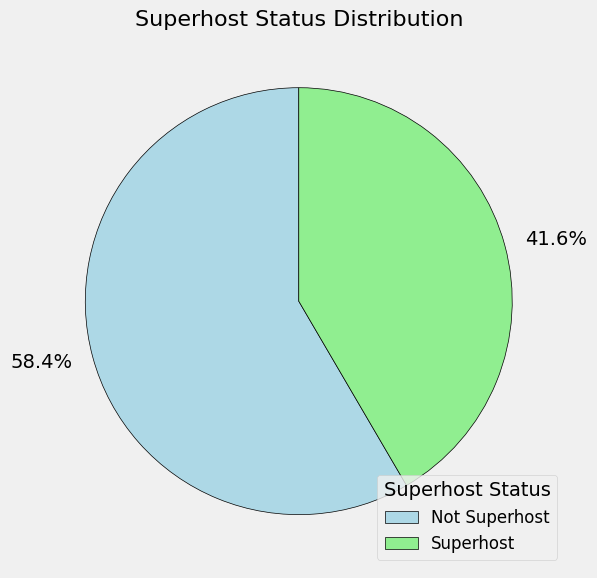

In [ ]:
# Pie chart of host status
new_colors = ['#add8e6', '#90ee90']  # Light blue and light green

# Calculate proportions for the `host_is_superhost` column
superhost_data = listings['host_is_superhost'].value_counts(normalize=True)

# Plot the pie chart with new colors
plt.figure(figsize=(10, 6))
plt.pie(
    superhost_data,
    labels=[f'{p:.1%}' for p in superhost_data],  # Show percentage in the pie chart
    autopct=None,
    startangle=90,
    colors=new_colors,
    wedgeprops={'edgecolor': 'black'}
)

# Add a legend
plt.legend(
    labels=['Not Superhost', 'Superhost'],
    loc='lower right',
    fontsize=12,
    title='Superhost Status'
)

# Add a title
plt.title('Superhost Status Distribution', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

### Different outcome?
The dataset reveals that 58.42% of hosts are non-superhosts, while 41.58% are superhosts. This distribution indicates a moderate class imbalance but ensures sufficient observations for both categories. Such a distribution is manageable for machine learning models, but techniques like class weighting or oversampling may be employed to address the imbalance and enhance model performance.

### Here, we can define the main question we aim to address: predicting the probability of a host being a superhost.

Based on the results from the “Superhost Status Distribution” chart, it can be observed that there are more Airbnb hosts in New York who are not superhosts. **Becoming a superhost on Airbnb offers hosts several benefits**, such as increased visibility, higher booking rates, reduced service fees, priority customer support, special rewards and offers, access to exclusive programs, enhanced trust and prestige, and recognition in promotional channels. These perks not only improve the profitability of hosting but also elevate the overall guest experience. Therefore, helping Airbnb hosts in New York achieve superhost status is an important issue.

reference: https://hospitable.com/airbnb-superhost-status/#:~:text=Airbnb%20Superhost%20Benefits,status%20for%20four%20consecutive%20quarters.

https://rentalsunited.com/blog/what-does-superhost-mean-on-airbnb/#:~:text=Access%20to%20Exclusive%20Programs:%20As,Superhost%20when%20booking%20their%20stay.

In [ ]:
#EDA 3: Performing t-test on all numerical variables to choose most significant variables that can explain
##the variation between being a superhost, and not being a superhost to include in our ML model

from scipy.stats import ttest_ind

# List of quantitative, continuous variables
numerical_vars = listings.select_dtypes(include=['float64', 'int64']).columns
numerical_vars = listings.drop(['name','host_is_superhost','host_name','host_since','host_response_time','host_verifications', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type', 'bathrooms_text', 'has_availability', 'is_phone',  'is_email','is_work_email','Is_a few days or more','Is_within a day','Is_within a few hours','Is_within an hour'], axis=1).columns

# Performing t-tests for all numerical columns
results = []

for var in numerical_vars:
    try:
        # Separate the variable values for superhosts and non-superhosts
        superhost_var = listings[listings['host_is_superhost'] == 1][var]
        non_superhost_var = listings[listings['host_is_superhost'] == 0][var]

        # Perform the t-test
        t_stat, p_val = ttest_ind(superhost_var, non_superhost_var, nan_policy='omit')

        # Append the results to the list
        results.append({'Variable': var, 'T-statistic': t_stat, 'P-value': p_val})
    except Exception as e:
        results.append({'Variable': var, 'T-statistic': 'Error', 'P-value': 'Error'})

# Converting results to a DataFrame for readability
results_df = pd.DataFrame(results)

results_df['T-statistic'] = results_df['T-statistic'].round(3)
results_df['P-value'] = results_df['P-value'].apply(lambda x: f'{x:.3e}' if isinstance(x, float) else x)


print(results_df)


                                        Variable  T-statistic     P-value
0                                        host_id       -6.956   3.660e-12
1                             host_response_rate       25.839  1.347e-143
2                           host_acceptance_rate       23.628  6.987e-121
3                           host_has_profile_pic        2.074   3.806e-02
4                         host_identity_verified       -4.085   4.439e-05
5                                  neighbourhood       12.385   4.946e-35
6                                   accommodates       -1.282   1.997e-01
7                                      bathrooms        0.680   4.964e-01
8                                       bedrooms        4.567   4.985e-06
9                                           beds        3.806   1.420e-04
10                                         price        3.083   2.054e-03
11                                minimum_nights       -6.701   2.155e-11
12                                maxi

A t-test was performed on all numerical variables to analyze the variation between superhosts and non-superhosts. It revealed several statistically significant predictors of superhost status. Variables such as host_response_rate , host_acceptance_rate, and review_scores_rating exhibited highly significant differences, indicating their strong explanatory power in distinguishing superhosts.

Other relevant variables include review_scores_cleanliness, calculated_host_listings_count, and number_of_reviews. These findings suggest that higher response rates, acceptance rates, review scores, and a larger number of reviews positively correlate with achieving superhost status. The significance of these variables (all p-values < 0.05 threshold) implies their inclusion in the ML model could enhance its predictive capability.

These results emphasize the importance of guest satisfaction metrics and host responsiveness as critical factors in distinguishing superhost status, aligning well with theoretical expectations.


In [ ]:
# EDA 4: Checking if host response time is statistically significant in describing variation between a host becoming a superhost or not
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(listings['host_response_time'], listings['host_is_superhost'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test for Host Response Time: Chi2-statistic = {chi2_stat}, p-value = {p_val}")



Chi-square test for Host Response Time: Chi2-statistic = 548.2860948597015, p-value = 1.6346352704631707e-118


A Chi-square test was applied to determine whether host_response_time is significantly related to superhost status. The results yielded a Chi-square statistic of 548.29 and a p-value of 1.63e-118, demonstrating a highly significant relationship. These findings suggest that response time is a key factor influencing superhost status, making it an essential variable for inclusion in predictive modeling efforts.

In [ ]:
#EDA 5: Descriptive analytics of some relevant variables
eda_columns = [ 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_value','calculated_host_listings_count', 'host_is_superhost']

eda_columns = listings[eda_columns]

desc_stats = eda_columns.groupby('host_is_superhost').mean()
display(desc_stats)

review_scores_rating                                       \
                                 count      mean       std  min   25%   50%   
host_is_superhost                                                             
0.0                             7578.0  4.610071  0.576852  1.0  4.50  4.75   
1.0                             5393.0  4.863121  0.198110  1.0  4.81  4.91   

                            review_scores_cleanliness            ...  \
                   75%  max                     count      mean  ...   
host_is_superhost                                                ...   
0.0                5.0  5.0                    7578.0  4.567593  ...   
1.0                5.0  5.0                    5393.0  4.829249  ...   

                  review_scores_communication      review_scores_value  \
                                          75%  max               count   
host_is_superhost                                                        
0.0                                       5.0  5.0              7578.0   
1.0                                       5.0  5.0              5393.0   

                                                                   
                       mean       std  min   25%   50%   75%  max  
host_is_superhost                                                  
0.0                4.484006  0.635391  1.0  4.35  4.65  4.86  5.0  
1.0                4.760074  0.246953  1.0  4.69  4.81  4.90  5.0  

[2 rows x 32 columns]

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

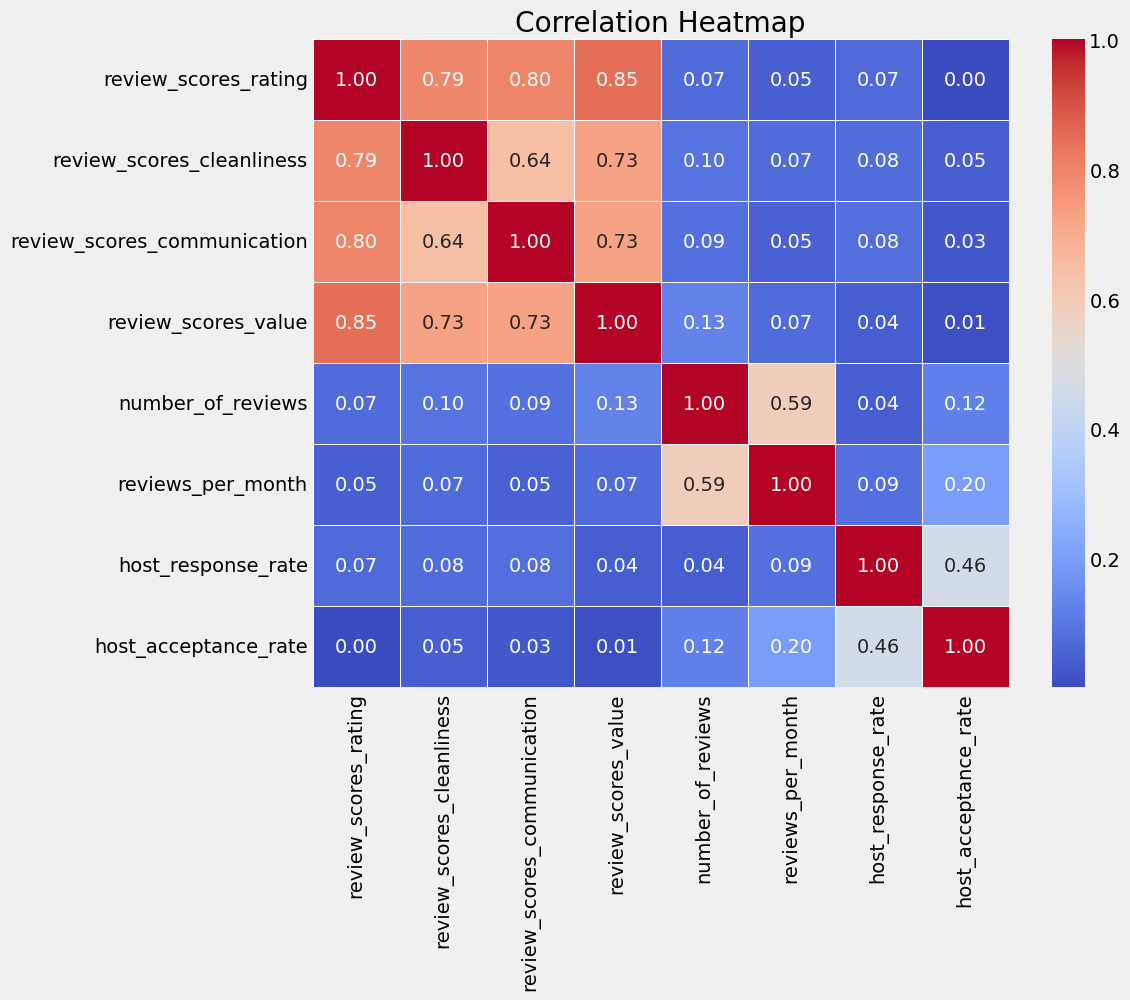

In [ ]:
# EDA 6: To check if variables are correlated, to avoid multicolinearity



correlation_matrix = listings[['review_scores_rating', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_value', 'number_of_reviews', 'reviews_per_month', 'host_response_rate', 'host_acceptance_rate']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()


# Data Visualisation

In [ ]:
data = listings
data

,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,...,calculated_host_listings_count_shared_rooms,reviews_per_month,is_phone,is_work_email,is_email,Is_a few days or more,Is_within a day,Is_within a few hours,Is_within an hour,host_duration_years
1,Room by Sunny & Bay! Sunset Park & Bay Ridge,358089614,Joshua,2020-07-23,within an hour,1.00,0.94,1.0,"[email, phone]",1.0,...,0,0.21,1,0,1,0,0,0,1,4.4
8,Cozy Clinton Hill Crib On Classon,2868,Letha M.,2008-09-10,within a day,1.00,0.00,0.0,"[email, phone]",1.0,...,0,0.02,1,0,1,0,1,0,0,16.2
13,Luxury apt in the best location of E. Williams...,736652,Luciana,2011-06-23,within an hour,1.00,0.00,0.0,[phone],1.0,...,0,0.37,1,0,0,0,0,0,1,13.5
14,The Grand III,61391963,Stay With Vibe,2016-03-03,within a few hours,0.99,0.71,0.0,"[email, phone]",1.0,...,0,0.86,1,0,1,0,0,1,0,8.8
24,Beautiful UES Apartment,13347167,AFI Apartments,2014-03-20,within a few hours,0.87,0.72,0.0,"[email, phone]",1.0,...,0,0.54,1,0,1,0,0,1,0,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37530,Private unit w/ private bath and entrance.,6324250,Linh,2013-05-10,within an hour,1.00,0.96,1.0,"[email, phone]",1.0,...,0,0.45,1,0,1,0,0,0,1,11.6
37532,"Private, Zen Apartment",42325550,Sherveal,2015-08-23,within an hour,1.00,1.00,0.0,"[email, phone]",1.0,...,0,0.91,1,0,1,0,0,0,1,9.3
37535,Lovely In-law suite apt /small terrace,476666525,Anadis,2022-08-25,within a day,1.00,1.00,1.0,"[email, phone]",1.0,...,0,3.08,1,0,1,0,1,0,0,2.3
37537,Modern 3 Bed 2 Bath Home With Parking | 2 min LGA,491695460,Prince,2022-12-16,within an hour,1.00,0.96,1.0,"[email, phone]",1.0,...,0,4.97,1,0,1,0,0,0,1,2.0


## Outliers Detection

Based on the results of outlier detection, we identified a significant number of outlier values in the columns “number_of_reviews_ltm”, “number_of_reviews”, “number_of_reviews_l30d”, “price”, “reviews_per_month”, and “minimum_nights”. We have decided to retain these values because, in the machine learning phase, these outliers can enable the logistic regression model to learn data characteristics more comprehensively, thereby enhancing its generalization capability. Additionally, as decision trees and random forests are insensitive to outliers, retaining these values may provide more information and improve the models’ predictive performance for events.

In [ ]:
# List of specific columns to analyze for outliers
columns_to_analyze = [
    "price", "minimum_nights", "maximum_nights", "availability_30", "availability_60",
    "availability_90", "availability_365", "number_of_reviews",
    "number_of_reviews_ltm", "number_of_reviews_l30d",
    "reviews_per_month", "host_duration_years"
]

# Filter the dataset to include only the specified columns
data_filtered = data[columns_to_analyze]

# Outlier detection for the specified columns
outlier_info = {}

for col in columns_to_analyze:
    if col in data_filtered.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = data_filtered[col].quantile(0.25)
        Q3 = data_filtered[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data_filtered[(data_filtered[col] < lower_bound) | (data_filtered[col] > upper_bound)]
        outlier_info[col] = {
            "lower_bound": lower_bound,
            "upper_bound": upper_bound,
            "outlier_count": outliers.shape[0],
        }

# Convert outlier information into a DataFrame for better readability
outlier_summary = pd.DataFrame(outlier_info).transpose()

# Sort by 'outlier_count' and display the result
outlier_summary_sorted = outlier_summary[['outlier_count']].sort_values(by='outlier_count', ascending=False)
outlier_summary_sorted

,outlier_count
number_of_reviews_ltm,1725.0
number_of_reviews,1293.0
number_of_reviews_l30d,1269.0
price,978.0
reviews_per_month,699.0
minimum_nights,124.0
maximum_nights,1.0
availability_30,0.0
availability_60,0.0
availability_90,0.0


Text(0.5, 0.98, 'Boxplots for Selected Variables')

{'whiskers': [<matplotlib.lines.Line2D at 0x7a367b1bd9c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a367b1bdf00>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7a367b1bd600>],
 'medians': [<matplotlib.lines.Line2D at 0x7a367b1be440>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a367b1be6e0>],
 'means': []}

Text(0.5, 1.0, 'number_of_reviews_ltm')

Text(0, 0.5, 'Value')

{'whiskers': [<matplotlib.lines.Line2D at 0x7a367b1bec50>,
 'caps': [<matplotlib.lines.Line2D at 0x7a367b1bf190>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7a367b1be9b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a367b1bf6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a367b1bf970>],
 'means': []}

Text(0.5, 1.0, 'number_of_reviews')

Text(0, 0.5, 'Value')

{'whiskers': [<matplotlib.lines.Line2D at 0x7a367b1bfeb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a367b174430>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7a367b1bfc10>],
 'medians': [<matplotlib.lines.Line2D at 0x7a367b174970>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a367b174c10>],
 'means': []}

Text(0.5, 1.0, 'number_of_reviews_l30d')

Text(0, 0.5, 'Value')

{'whiskers': [<matplotlib.lines.Line2D at 0x7a367b175180>,
 'caps': [<matplotlib.lines.Line2D at 0x7a367b1756c0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7a367b174ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a367b175c00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a367b175ea0>],
 'means': []}

Text(0.5, 1.0, 'price')

Text(0, 0.5, 'Value')

{'whiskers': [<matplotlib.lines.Line2D at 0x7a367b1763e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a367b176920>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7a367b176140>],
 'medians': [<matplotlib.lines.Line2D at 0x7a367b176e60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a367b177100>],
 'means': []}

Text(0.5, 1.0, 'reviews_per_month')

Text(0, 0.5, 'Value')

{'whiskers': [<matplotlib.lines.Line2D at 0x7a367b177640>,
 'caps': [<matplotlib.lines.Line2D at 0x7a367b177b80>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7a367b1773a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a367b140100>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a367b1403a0>],
 'means': []}

Text(0.5, 1.0, 'minimum_nights')

Text(0, 0.5, 'Value')

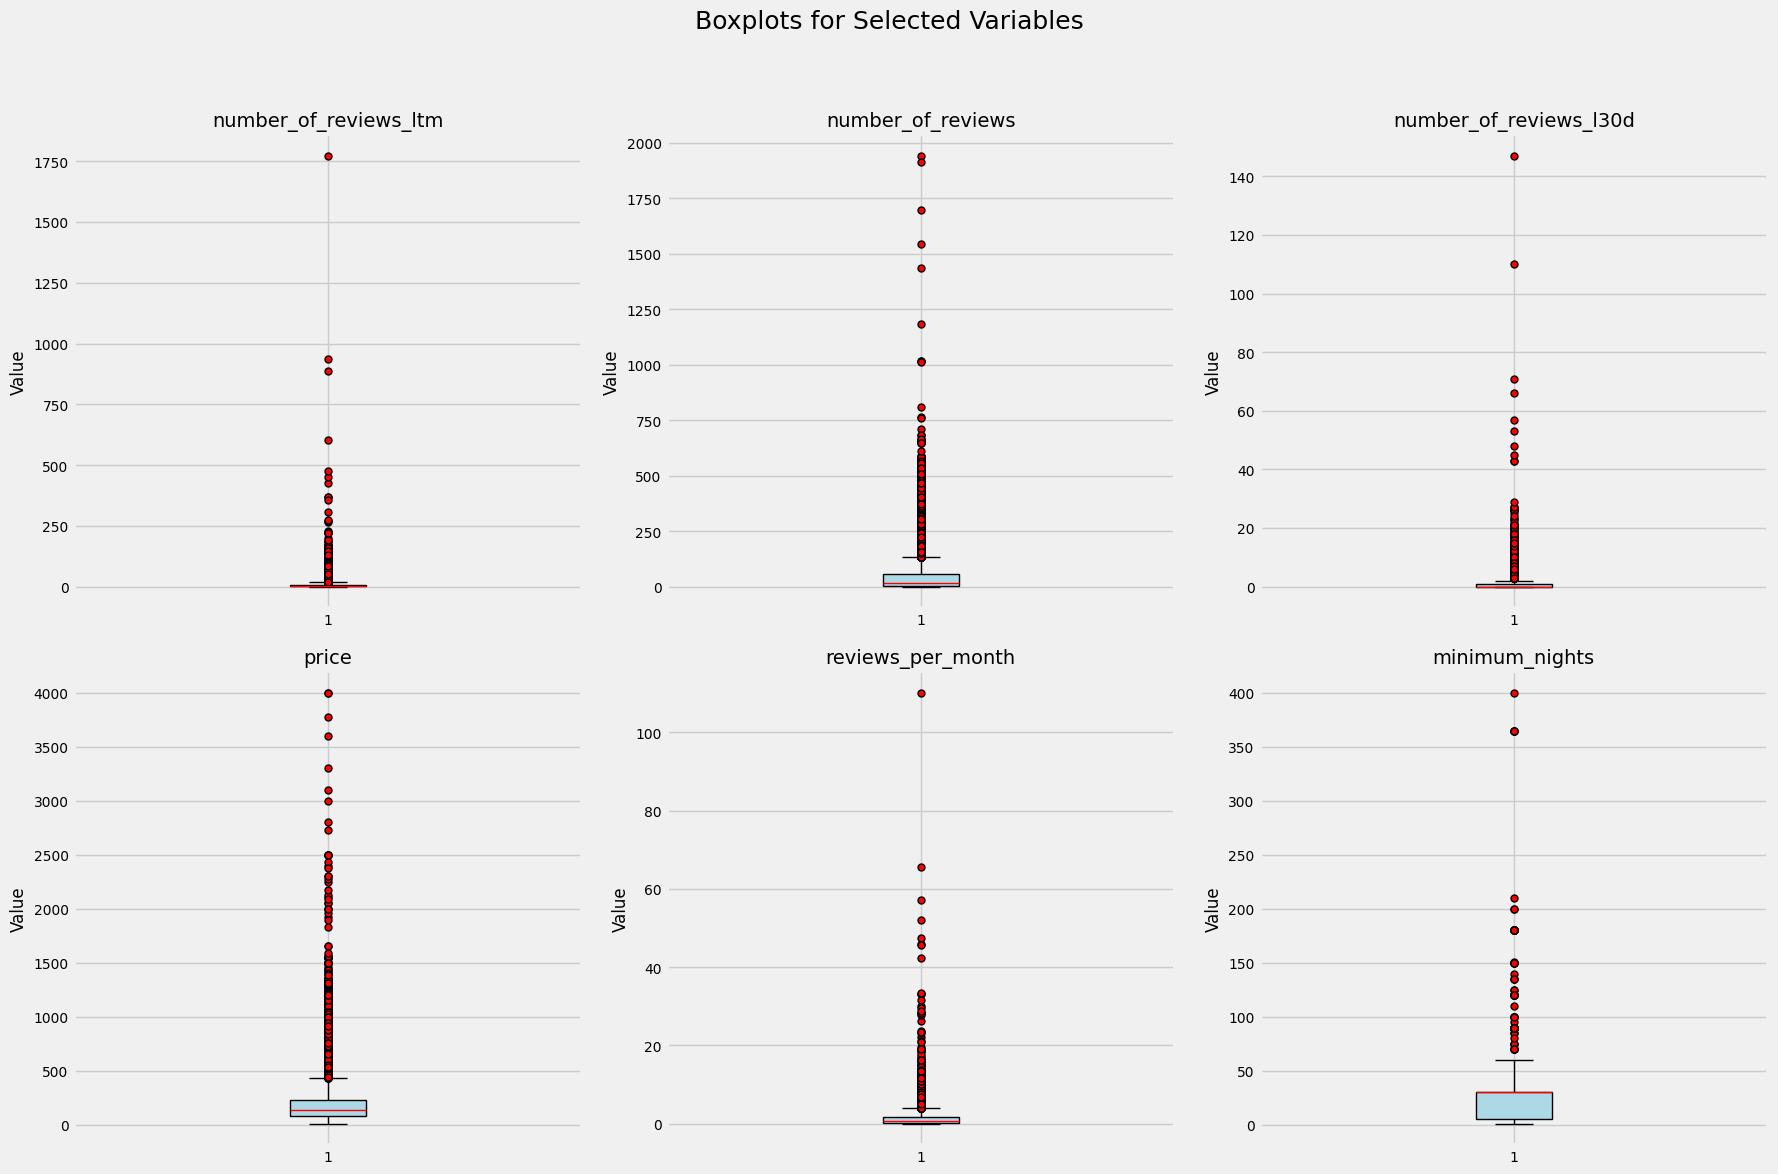

In [ ]:
# Create subplots for each column with appropriate y-axis scales
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Boxplots for Selected Variables', fontsize=18)

columns_to_plot = [
    "number_of_reviews_ltm", "number_of_reviews",
    "number_of_reviews_l30d", "price",
    "reviews_per_month", "minimum_nights"
]

# Define axes for each column
for ax, col in zip(axes.flatten(), columns_to_plot):
    ax.boxplot(
        data_filtered[col].dropna(),
        vert=True,
        patch_artist=True,
        boxprops=dict(facecolor='lightblue', color='black'),
        medianprops=dict(color='red'),
        flierprops=dict(markerfacecolor='red', marker='o', markersize=5)
    )
    ax.set_title(col, fontsize=14)
    ax.set_ylabel('Value', fontsize=12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to accommodate the title
plt.show()

## House Related Data Visualization

First, regarding the Airbnb property data in New York, we took a closer look at the house booking price. Based on the distribution of house booking prices (grouped in intervals of 100 dollars), to prevent outliers from affecting the visualization of the histogram, we chose to focus on properties with prices under 2000 dollars for visualization purposes. These properties account for 99.8% of the total data. Based on the results from the **“Price Distribution of Airbnb in New York”** chart, it can be observed that the majority of Airbnb property prices in New York are concentrated below $1000 per night.

In addition, we focused on different neighborhoods to further illustrate the variations in property price distributions across each area. Based on the results from the **“Price Distribution by Neighborhood Group”** chart, Airbnb properties are heavily concentrated in Manhattan, particularly in neighborhoods such as Midtown, Chelsea, and the Upper East Side. These areas are known for their proximity to major tourist attractions, cultural institutions, and business districts. Furthermore, dense clusters of Airbnb properties are found in Williamsburg, Downtown Brooklyn, and Park Slope, which are popular for their vibrant arts scene, trendy restaurants, and relatively more affordable accommodations compared to Manhattan. Significant activity is also observed near Long Island City and Flushing, areas that offer convenient access to both JFK and LaGuardia airports and attract visitors seeking diverse cultural experiences.

Overall, the areas with a high concentration of Airbnb properties in New York share common characteristics of being well-connected by public transportation, close to tourist attractions, and offering cultural and social diversity.

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

data['price'].max()
data['price'].min()
# calculate the number of bins
bins = range(0, int(data['price'].max()) + 100, 100)

price_bins = pd.cut(data['price'], bins=bins)

price_distribution = price_bins.value_counts().sort_index()

price_distribution_df = price_distribution.reset_index()
price_distribution_df.columns = ['Price Range', 'Frequency']
price_distribution_df

print("The proportion of houses' price < = 2000:")
(data['price'] <= 2000).sum() / len(data)

4000.0

10.0

,Price Range,Frequency
0,"(0, 100]",4373
1,"(100, 200]",4842
2,"(200, 300]",1778
3,"(300, 400]",801
4,"(400, 500]",474
5,"(500, 600]",237
6,"(600, 700]",151
7,"(700, 800]",74
8,"(800, 900]",53
9,"(900, 1000]",61


The proportion of houses' price < = 2000:


0.997995528486624

(array([4.115e+03, 4.896e+03, 1.885e+03, 8.620e+02, 4.810e+02, 2.480e+02,
        1.590e+02, 7.600e+01, 5.600e+01, 5.800e+01, 3.100e+01, 1.900e+01,
        1.800e+01, 1.200e+01, 8.000e+00, 1.200e+01, 2.000e+00, 0.000e+00,
        1.000e+00, 6.000e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
        1800., 1900., 2000.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Price Distribution of Airbnb in New York')

Text(0.5, 0, 'Price ($)')

Text(0, 0.5, 'Frequency')

[Text(0.0, 0, '0'),
 Text(200.0, 0, '200'),
 Text(400.0, 0, '400'),
 Text(600.0, 0, '600'),
 Text(800.0, 0, '800'),
 Text(1000.0, 0, '1000'),
 Text(1200.0, 0, '1200'),
 Text(1400.0, 0, '1400'),
 Text(1600.0, 0, '1600'),
 Text(1800.0, 0, '1800'),
 Text(2000.0, 0, '2000')]

<Axes: title={'center': 'price'}, xlabel='neighbourhood_group_cleansed'>

Text(0.5, 1.0, 'Price Distribution by Neighbourhood Group')

Text(0.5, 0, 'Neighbourhood Group')

Text(0, 0.5, 'Price ($)')

Text(0.5, 0.98, '')

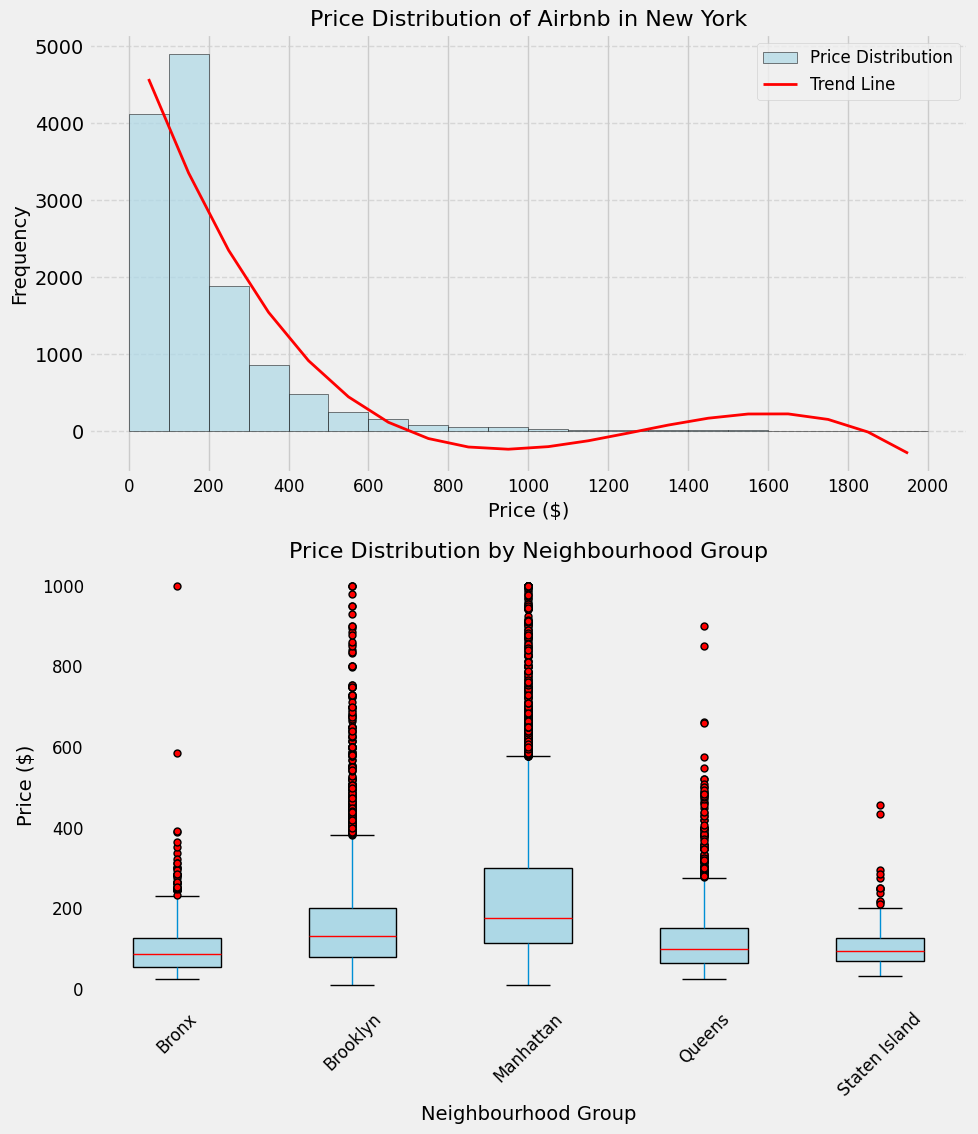

In [ ]:
# Histogram Data Preparation
bins = np.linspace(0, 2000, 21)  # 20 bins
bin_centers = (bins[:-1] + bins[1:]) / 2
hist, _ = np.histogram(data["price"], bins=bins)
z = np.polyfit(bin_centers, hist, 3)
p = np.poly1d(z)

# Boxplot Data Preparation
boxplot_data_cleaned = data[['neighbourhood_group_cleansed', 'price']]
boxplot_data_cleaned = boxplot_data_cleaned[boxplot_data_cleaned['price'] <= 1000]

# Create subplots for Histogram and Boxplot
fig, axs = plt.subplots(2, 1, figsize=(10, 12))  # 2 rows, 1 column

# Histogram Plot
axs[0].hist(data["price"], bins=bins, color='lightblue', edgecolor='black', alpha=0.7, label='Price Distribution')
axs[0].plot(bin_centers, p(bin_centers), color='red', linewidth=2, label='Trend Line')
axs[0].set_title('Price Distribution of Airbnb in New York', fontsize=16)
axs[0].set_xlabel('Price ($)', fontsize=14)
axs[0].set_ylabel('Frequency', fontsize=14)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].legend(fontsize=12)
axs[0].set_xticks(bins[::2])
axs[0].set_xticklabels([f"{int(x)}" for x in bins[::2]], fontsize=12)

# Boxplot
boxplot_data_cleaned.boxplot(
    column='price',
    by='neighbourhood_group_cleansed',
    ax=axs[1],
    grid=False,
    vert=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='black'),
    medianprops=dict(color='red'),
    flierprops=dict(markerfacecolor='red', marker='o', markersize=5)
)
axs[1].set_title('Price Distribution by Neighbourhood Group', fontsize=16)
axs[1].set_xlabel('Neighbourhood Group', fontsize=14)
axs[1].set_ylabel('Price ($)', fontsize=14)
axs[1].tick_params(axis='x', rotation=45, labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)

# Adjust layout and display
plt.tight_layout()
plt.suptitle('')  # Remove the automatic subplot title from boxplot
plt.show()  # Ensure only the final plots are displayed

In addition, we focused on different neighborhoods to further illustrate the distribution of Airbnb properties across New York.

Based on the results from the map, it can be observed that Airbnb properties are heavily concentrated in Manhattan, particularly in neighborhoods like Midtown, Chelsea, and the Upper East Side. These areas are known for their proximity to major tourist attractions, cultural institutions, and business districts. Additionally, dense clusters of Airbnb properties are found in Williamsburg, Downtown Brooklyn, and Park Slope. These areas are popular for their vibrant arts scene, trendy restaurants, and relatively more affordable accommodations compared to Manhattan. Significant activity is also observed near Long Island City and Flushing. These areas offer convenient access to both JFK and LaGuardia airports and attract visitors seeking diverse cultural experiences.

Overall, the concentrated distribution of Airbnb properties in New York is characterized by excellent public transportation connectivity, proximity to tourist attractions, and cultural and social diversity.

In [ ]:
from folium.plugins import HeatMap
import folium

# Ensure relevant columns are present and drop missing values
heatmap_data = data[['latitude', 'longitude']]

# Create a base map
m = folium.Map(location=[heatmap_data['latitude'].mean(), heatmap_data['longitude'].mean()], zoom_start=11)

# Add a heatmap layer
HeatMap(
    heatmap_data,
    radius=10,
    gradient={0.2: 'blue', 0.4: 'purple', 0.6: 'orange', 1.0: 'red'}
).add_to(m)

legend_html = '''
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 220px; height: 140px;
            background-color: white; z-index:1000; font-size:14px;
            border:2px solid grey; padding: 10px;">
    <b>Heatmap Legend</b><br>
    <i style="background: blue; width: 18px; height: 18px; display: inline-block; margin-right: 5px;"></i> Low Density<br>
    <i style="background: purple; width: 18px; height: 18px; display: inline-block; margin-right: 5px;"></i> Medium-Low Density<br>
    <i style="background: orange; width: 18px; height: 18px; display: inline-block; margin-right: 5px;"></i> Medium-High Density<br>
    <i style="background: red; width: 18px; height: 18px; display: inline-block; margin-right: 5px;"></i> High Density<br>
</div>
'''

m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
m

## Room Related Data Visualization

Thirdly, we focused on room-related data. Since Airbnb offers various types of accommodations, we explored the proportion of different room types available in each neighborhood on the platform.

Based on the results from the “Room Type Distribution by Neighbourhood Group” chart, it can be observed that Manhattan features the most diverse range of Airbnb room types. Across all five neighborhoods, “Entire home/apt” and “Private room” are the most commonly available room types.

([<matplotlib.patches.Wedge at 0x7a367a7bb010>,
 [Text(-0.8811503127511379, -0.6584634586205769, '70.4%'),
  Text(1.0704636094842157, -0.25319490668262845, '1.8%'),
  Text(0.8533345917072287, 0.6941326059160868, '27.4%'),
  Text(0.015289941554156857, 1.099893730179089, '0.4%')])

Text(0.5, 1.0, 'Manhattan')

([<matplotlib.patches.Wedge at 0x7a367a7baec0>,
 [Text(-1.0966553290929808, -0.08571516302245694, '52.5%'),
  Text(0.1731007951716378, -1.086294672135948, '0.1%'),
  Text(1.0987465903155944, 0.05249695486269488, '46.4%'),
  Text(0.035498054751768565, 1.0994270726650497, '1.0%')])

Text(0.5, 1.0, 'Brooklyn')

([<matplotlib.patches.Wedge at 0x7a367a7e0370>,
 [Text(-1.0687066687533016, 0.2605111440269325, '42.4%'),
  Text(1.0638000033857085, -0.27987417315030544, '57.0%'),
  Text(0.01997408888414562, 1.0998186376731613, '0.6%')])

Text(0.5, 1.0, 'Bronx')

([<matplotlib.patches.Wedge at 0x7a367a7e15d0>,
 [Text(-1.0536180504040806, 0.316052216987485, '40.7%'),
  Text(1.0408910053103277, -0.3557329265952974, '58.1%'),
  Text(0.04166436734618631, 1.0992106624726865, '1.2%')])

Text(0.5, 1.0, 'Queens')

([<matplotlib.patches.Wedge at 0x7a367a7e2290>,
 [Text(-1.09877886478687, -0.05181704640055805, '51.5%'),
  Text(1.099457220672465, 0.03455169910697062, '48.0%'),
  Text(0.017278222430067523, 1.0998642930060314, '0.5%')])

Text(0.5, 1.0, 'Staten Island')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 0.98, 'Room Type Distribution by Neighbourhood Group')

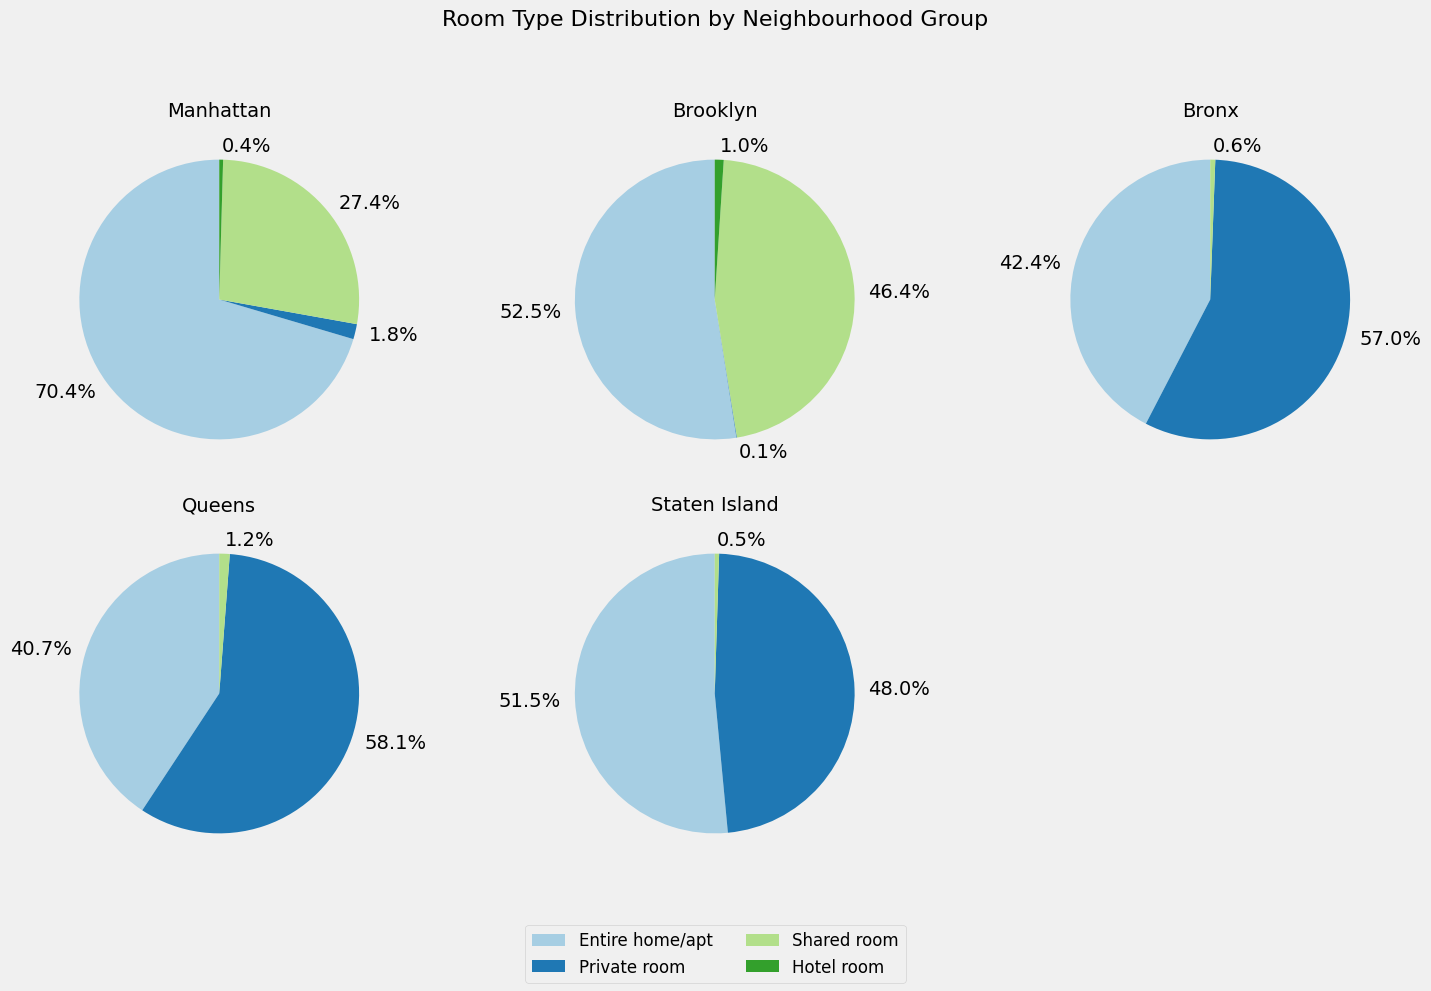

In [ ]:
# Calculate proportions for room types within each neighbourhood group
grouped_data = data[['neighbourhood_group_cleansed', 'room_type']]
grouped_data = grouped_data.groupby(['neighbourhood_group_cleansed', 'room_type']).size().reset_index(name='counts')
grouped_data['proportion'] = grouped_data.groupby('neighbourhood_group_cleansed')['counts'].transform(lambda x: x / x.sum())

# Re-arrange the layout to have two rows of pie charts and update legend and labels
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the layout to fit 5 neighbourhoods
axes = axes.flatten()

# Define order for the plots
ordered_neighbourhoods = ["Manhattan", "Brooklyn", "Bronx", "Queens", "Staten Island"]

for i, group in enumerate(ordered_neighbourhoods):
    subset = grouped_data[grouped_data['neighbourhood_group_cleansed'] == group]
    ax = axes[i]
    ax.pie(
        subset['proportion'],
        labels=[f'{p:.1%}' for p in subset['proportion']],  # Show only percentage labels
        autopct=None,
        startangle=90,
        colors=plt.cm.Paired.colors
    )
    ax.set_title(group, fontsize=14)

# Hide unused subplot axes (if any)
for j in range(len(ordered_neighbourhoods), len(axes)):
    axes[j].axis('off')

# Add legend to the figure with all room types
plt.figlegend(
    labels=["Entire home/apt", "Private room", "Shared room", "Hotel room"],
    loc='lower center',
    ncol=2,
    fontsize=12,
    frameon=True
)

plt.suptitle('Room Type Distribution by Neighbourhood Group', fontsize=16)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # Leave space for the legend
plt.show()

## Host Related Data Visualization--Appendix

The dataset contains extensive information about hosts. Before proceeding to the machine learning phase, we aim to examine the correlations among host-related variables to identify which variables are closely related and which might be independent. Additionally, we plan to use a heatmap to explore which features are strongly associated with being a superhost.

Based on the results from the “Correlation Map of Host-Related Rates” chart, it can be observed that there is a clear negative correlation between host response time and response rate. This is logical, as the shorter the response time (the more timely the replies), the higher the response rate over a period of time. Conversely, the longer the response time (the less timely the replies), the lower the response rate over a period of time.

In [ ]:
data['host_response_time'].unique()
response_time_mapping = {
    'within an hour': 1,
    'within a day': 3,
    'within a few hours': 2,
    'a few days or more': 4
}
data['host_response_time_numeric'] = data['host_response_time'].map(response_time_mapping)

array(['within an hour', 'within a day', 'within a few hours',
       'a few days or more'], dtype=object)

<Figure size 800x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Map of host related rate')

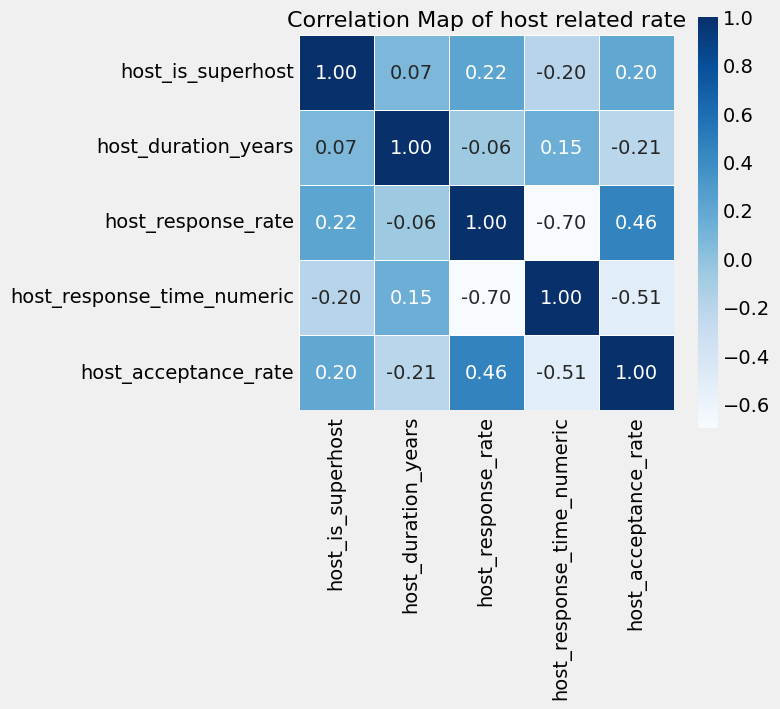

In [ ]:
# Adjust the color palette to represent high to low correlation with blue shades
blue_cmap = sns.color_palette("Blues", as_cmap=True)

# Ensure the relevant columns are numeric and clean data
correlation_data = data[
    ['host_is_superhost', 'host_duration_years', 'host_response_rate', 'host_response_time_numeric', 'host_acceptance_rate']
].copy()

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix using the updated color palette
plt.figure(figsize=(8, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap=blue_cmap,
    fmt=".2f",
    square=True,
    cbar_kws={"shrink": 0.8},
    linewidths=0.5
)

plt.title('Correlation Map of host related rate', fontsize=16)
plt.tight_layout()
plt.show()

Based on the results from the “Host Verifications Distribution” chart, it can be observed that email and phone verification is the most common method of host verification. This means that both Airbnb and customers can contact the host through email and phone. However, a small number of hosts have only verified their email, which means customers can only contact the host via email. This inefficient method of communication can lead to delays in the host’s ability to check and respond to customer messages, negatively impacting the service experience.

In [ ]:
data['host_verifications'] = data['host_verifications'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
data['host_verifications'] = data['host_verifications'].astype('category')
data['host_verifications'].value_counts()

,count
host_verifications,
"email, phone",10272
"email, phone, work_email",1595
phone,1062
"phone, work_email",38
email,3
,1


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Host Verifications Distribution')

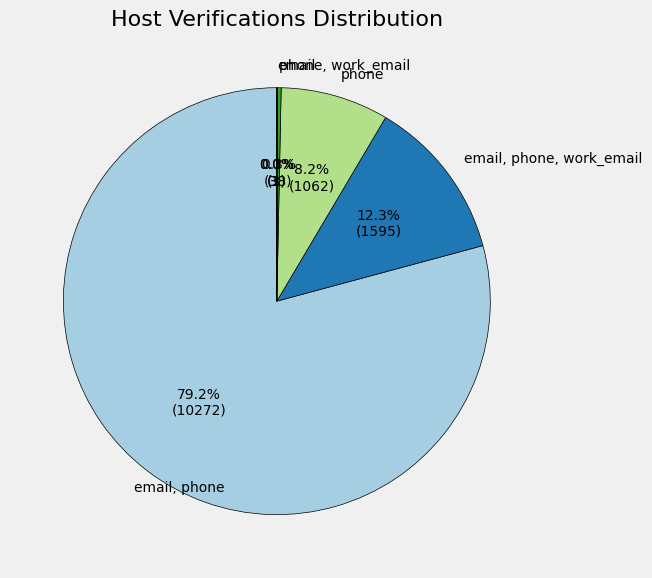

In [ ]:
# Data preparation
verification_counts = data['host_verifications'].value_counts()
labels = list(verification_counts.index)
sizes = list(verification_counts.values)

# Define custom autopct function to adjust percentage label positions
def autopct_func(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))  # Calculate absolute count
    return f'{pct:.1f}%\n({absolute})'  # Show percentage and absolute count

# Plot the pie chart
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,  # Show category names as labels
    autopct=lambda pct: autopct_func(pct, sizes),  # Custom function for percentages
    startangle=90,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 10},  # Adjust text size
    labeldistance=1.1  # Adjust label distance from the center
)

# Improve label readability by moving some labels further away
for text, wedge in zip(texts, wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    if angle > 180:
        text.set_horizontalalignment('left')
    else:
        text.set_horizontalalignment('right')

# Add a title
plt.title('Host Verifications Distribution', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

## Review Related Data Visualization

Lastly, regarding review-related data, we took a closer look at the number of reviews. Based on the distribution of reviews (grouped in intervals of 50), to prevent outliers from affecting the scatter plot visualization, we chose to focus on properties with fewer than 800 reviews. These properties account for 99.9% of the total data. Additionally, we restricted the analysis to properties priced under $2000.

From the “Relationship between Price, Review Scores, and Number of Reviews” chart, it can be observed that:
Low-priced properties (under 500 dollars) tend to have a wide range of review scores, mostly between 3.0 and 5.0, indicating a large number of budget-friendly listings.
Moderately priced properties (500 – 1000 dollars) show a noticeable trend of higher review scores (closer to 4.0–5.0). This Suggests that moderately priced properties are often well-rated, likely due to a balance between cost and quality.
High-priced properties (around 2000 dollars) have mixed review scores, indicating that luxury listings may face challenges in consistently meeting guest expectations.

Furthermore, listings with a higher number of reviews (represented by lighter-colored markers) are predominantly found at lower price points and higher review scores. This implies that affordable and well-rated properties attract more bookings, resulting in more reviews.

In [ ]:
bins = range(0, int(data['number_of_reviews'].max()) + 50, 50)
review_bins = pd.cut(data['number_of_reviews'], bins=bins)
review_distribution = review_bins.value_counts().sort_index()

review_distribution_df = review_distribution.reset_index()
review_distribution_df.columns = ['Review Range', 'Frequency']
review_distribution_df

print("The proportion of houses' reviews < = 800:")
(data['number_of_reviews'] <= 800).sum() / len(data)

,Review Range,Frequency
0,"(0, 50]",9446
1,"(50, 100]",1670
2,"(100, 150]",761
3,"(150, 200]",446
4,"(200, 250]",266
5,"(250, 300]",148
6,"(300, 350]",79
7,"(350, 400]",51
8,"(400, 450]",29
9,"(450, 500]",22


The proportion of houses' reviews < = 800:


0.9992290494179323

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Relationship between Price (<= 2000), Review Scores, and Number of Reviews (<= 800)')

Text(0.5, 0, 'Price ($)')

Text(0, 0.5, 'Review Scores Rating')

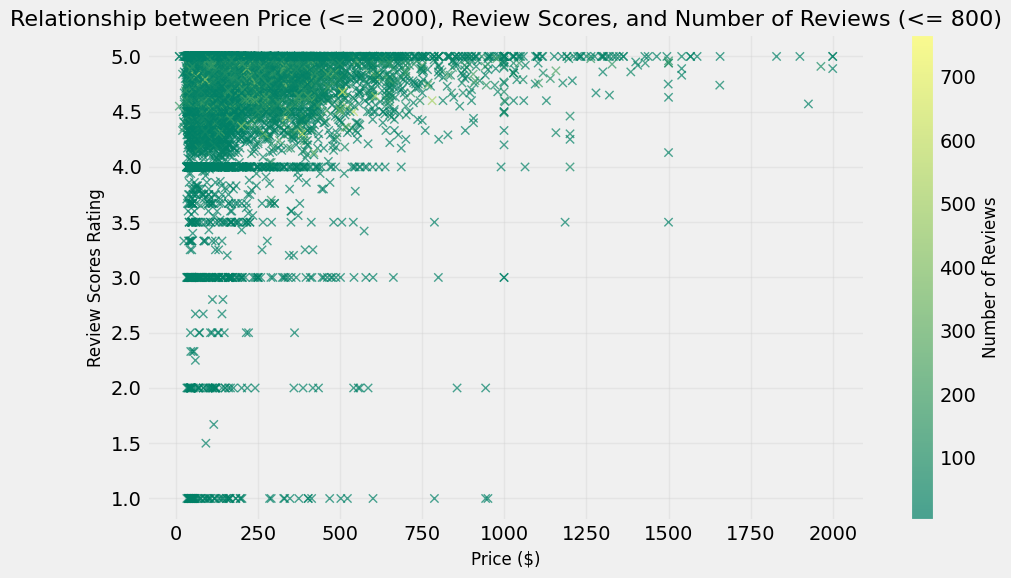

In [ ]:
# Filter the relevant columns and remove missing values
relationship_data = data[['price', 'review_scores_rating', 'number_of_reviews']].dropna()

# Filter data where number_of_reviews <= 800 and price <= 2000
filtered_data = relationship_data[(relationship_data['number_of_reviews'] <= 800) & (relationship_data['price'] <= 2000)]

# Plot a scatter plot with 'x' markers instead of circles
plt.figure(figsize=(10, 6))
plt.scatter(
    filtered_data['price'],
    filtered_data['review_scores_rating'],
    c=filtered_data['number_of_reviews'],
    cmap='summer',  # Use a light blue to light green gradient
    alpha=0.7,
    marker='x',  # Change the marker to 'x'
    linewidths=1  # Make the 'x' thinner
)

# Add color bar
cbar = plt.colorbar()
cbar.set_label('Number of Reviews', fontsize=12)

# Add titles and labels
plt.title('Relationship between Price (<= 2000), Review Scores, and Number of Reviews (<= 800)', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Review Scores Rating', fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

The dataset contains extensive information about review scores. Before proceeding to the machine learning phase, we aim to examine the correlations among review score-related variables to identify which variables are closely related and which might be independent. Additionally, we plan to use a heatmap to explore which features are strongly associated with the most important review score—review_scores_rating.

Based on the results from the “Correlation Map between Review Scores” chart, it can be observed that review scores are highly correlated, particularly among accuracy score, value score, communication score, and overall rating score, which demonstrate strong correlations with each other.

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Map between Review Scores')

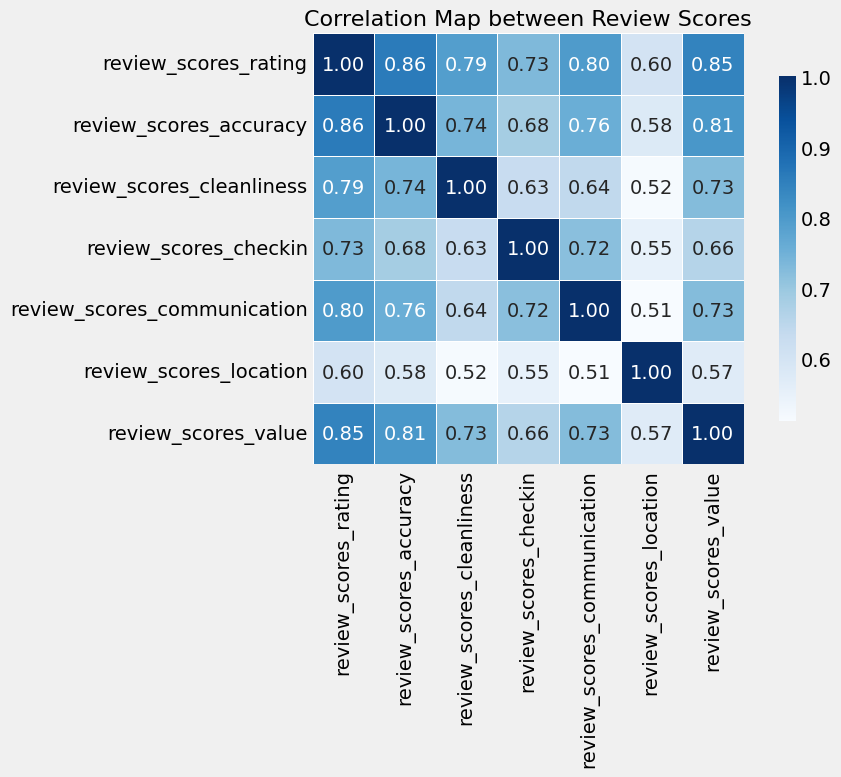

In [ ]:
# Adjust the color palette to blue shades
blue_cmap = sns.color_palette("Blues", as_cmap=True)

# Extract the relevant columns and drop missing values
columns_of_interest = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]
correlation_data = data[columns_of_interest]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation heatmap with blue shades
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap=blue_cmap,  # Use blue shades
    fmt=".2f",
    square=True,
    cbar_kws={"shrink": 0.8},
    linewidths=0.5
)

# Add title
plt.title('Correlation Map between Review Scores', fontsize=16)
plt.tight_layout()
plt.show()

# Machine Learning

1-1 Classification - Backward Elimination Logistic Regression (Comparison between P-value, AIC & BIC)

In [ ]:
# Train-test split
train, test = train_test_split(listings, test_size=0.25, random_state=42)

# Define dependent and initial independent variables
dependent_var = 'host_is_superhost'
independent_vars = [
    'host_response_rate', 'host_acceptance_rate', 'host_has_profile_pic', 'host_identity_verified',
    'neighbourhood', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
    'maximum_nights', 'has_availability', 'availability_30', 'availability_60', 'availability_90',
    'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'instant_bookable', 'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'host_duration_years',
    'is_work_email', 'is_phone', 'is_email', 'Is_a few days or more', 'Is_within a day',
    'Is_within a few hours', 'Is_within an hour'
]

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, roc_auc_score, brier_score_loss, classification_report

# Backward Elimination with AIC
def backward_elimination_aic(independent_vars):
    # Add constant to X_train
    X_train = sm.add_constant(train[independent_vars])
    y_train = train[dependent_var]

    # Initial model and AIC value
    model = sm.Logit(y_train, X_train).fit(disp=False)  # Suppress output
    current_aic = model.aic  # Initialize with current AIC value

    # List to store dropped variables and their AIC values
    dropped_vars = []

    while True:
        aic_values = {}

        # Evaluate each variable for its impact on AIC
        for var in independent_vars:
            temp_vars = independent_vars.copy()
            temp_vars.remove(var)  # Temporarily remove the variable

            try:
                X_temp = sm.add_constant(train[temp_vars])  # Add constant to temp model
                temp_model = sm.Logit(y_train, X_temp).fit(disp=False)  # Suppress output
                aic_values[var] = temp_model.aic  # Store AIC value
            except Exception:
                continue  # Skip if model throws an error (e.g., singular matrix)

        # Find the variable whose removal minimizes AIC
        if not aic_values:  # If no variables left to evaluate, exit loop
            break
        best_var_to_remove = min(aic_values, key=aic_values.get)  # Variable with lowest AIC
        best_aic = aic_values[best_var_to_remove]

        if best_aic < current_aic:  # If removing the variable improves AIC
            # Track the variable being dropped and the AIC values before and after
            dropped_vars.append({
                'Variable': best_var_to_remove,
                'AIC Before': current_aic,
                'AIC After': best_aic
            })

            print(f"Dropping '{best_var_to_remove}' to reduce AIC from {current_aic:.2f} to {best_aic:.2f}")

            # Update independent variables and current AIC
            independent_vars.remove(best_var_to_remove)
            current_aic = best_aic

            # Refit the model with updated variables
            X_train = sm.add_constant(train[independent_vars])
            model = sm.Logit(y_train, X_train).fit(disp=False)
        else:
            break  # Stop if no further improvement in AIC

    # Convert dropped variables into a DataFrame
    dropped_df = pd.DataFrame(dropped_vars)

    return model, independent_vars, dropped_df

# Run backward elimination using AIC
print("\nRunning Backward Elimination using AIC...")
final_model_AIC, final_vars_AIC, dropped_vars_AIC = backward_elimination_aic(independent_vars)

# Display the final model summary
print("\nFinal Logistic Regression Model using AIC:")
print(final_model_AIC.summary())

# Evaluate the model
X_test_AIC = sm.add_constant(test[final_vars_AIC])  # Add constant to test data
y_test = test[dependent_var]

# Generate predictions
y_pred_prob_AIC = final_model_AIC.predict(X_test_AIC)
y_pred_AIC = (y_pred_prob_AIC >= 0.5).astype(int)

# Classification report and accuracy
print("\nClassification Report for AIC Model:")
print(classification_report(y_test, y_pred_AIC))

# Evaluate metrics
accuracy_AIC = accuracy_score(y_test, y_pred_AIC)  # Accuracy
auc_roc_AIC = roc_auc_score(y_test, y_pred_prob_AIC)  # AUC-ROC
brier_score_AIC = brier_score_loss(y_test, y_pred_prob_AIC)  # Brier Score

# Create DataFrame for metrics
result_AIC = pd.DataFrame({
    'Metric': ['Accuracy', 'AUC-ROC', 'Brier Score'],
    'Value': [accuracy_AIC, auc_roc_AIC, brier_score_AIC]
})

# Display results
print("\nEvaluation Report:")
print(result_AIC)

# Display dropped variables DataFrame
print("\nDropped Variables During Backward Elimination:")
print(dropped_vars_AIC)


Running Backward Elimination using AIC...
Dropping 'bathrooms' to reduce AIC from 10160.79 to 10158.79
Dropping 'minimum_nights' to reduce AIC from 10158.79 to 10156.82
Dropping 'is_phone' to reduce AIC from 10156.82 to 10154.87
Dropping 'review_scores_value' to reduce AIC from 10154.87 to 10152.92
Dropping 'reviews_per_month' to reduce AIC from 10152.92 to 10151.07
Dropping 'bedrooms' to reduce AIC from 10151.07 to 10149.23
Dropping 'availability_60' to reduce AIC from 10149.23 to 10147.98
Dropping 'availability_30' to reduce AIC from 10147.98 to 10146.48
Dropping 'review_scores_checkin' to reduce AIC from 10146.48 to 10145.27
Dropping 'host_has_profile_pic' to reduce AIC from 10145.27 to 10144.42
Dropping 'host_identity_verified' to reduce AIC from 10144.42 to 10143.74
Dropping 'is_work_email' to reduce AIC from 10143.74 to 10143.21
Dropping 'calculated_host_listings_count_shared_rooms' to reduce AIC from 10143.21 to 10142.78
Dropping 'has_availability' to reduce AIC from 10142.78 t

1-2 Classification - Decision Tree Classifier

In [ ]:
# Prepare training and testing data
X_train = train[independent_vars]
y_train = train[dependent_var]
X_test = test[independent_vars]
y_test = test[dependent_var]

# Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_classifier.fit(X_train, y_train)

# Decision Tree Summary
tree_rules = export_text(dt_classifier, feature_names=list(X_train.columns))
print("Decision Tree Rules:\n")
print(tree_rules)

# Decision Tree Diagram
plt.figure(figsize=(20, 10))
plot_tree(
    dt_classifier,
    feature_names=X_train.columns,
    class_names=['Not Superhost', 'Superhost'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

# Predictions on test dataset
y_pred = dt_classifier.predict(X_test)
y_pred_prob_dt_class = dt_classifier.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1 (Superhost)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Evaluate metrics
accuracy_dt_class = accuracy_score(y_test, y_pred)  # Accuracy
auc_roc_dt_class = roc_auc_score(y_test, y_pred_prob_dt_class)  # AUC-ROC
brier_score_dt_class = brier_score_loss(y_test, y_pred_prob_dt_class)  # Brier Score

result_dt_class = pd.DataFrame({
    'Metric': ['Accuracy', 'AUC-ROC', 'Brier Score'],
    'Value': [accuracy_dt_class, auc_roc_dt_class, brier_score_dt_class]
})

print("\nEvaluation Report")
display(result_dt_class)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=['Actual: Not Superhost', 'Actual: Superhost'],
    columns=['Predicted: Not Superhost', 'Predicted: Superhost']
)
print("\nConfusion Matrix\n")
print(conf_matrix_df)

Evaluation and Comparison

In [ ]:
# Create a DataFrame for model accuracies
evaluation_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [accuracy_log, accuracy_dt_class],
    'AUC-ROC': [auc_roc_log, auc_roc_dt_class],
    'Brier Score': [brier_score_log, brier_score_dt_class]
})

print("\nEvaluation I:")
display(evaluation_df)



# Calculate ROC curve and AUC for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob_log)
auc_log = roc_auc_score(y_test, y_pred_prob_log)

# Calculate ROC curve and AUC for Decision Tree
fpr_dt_class, tpr_dt_class, _ = roc_curve(y_test, y_pred_prob_dt_class)
auc_dt_class = roc_auc_score(y_test, y_pred_prob_dt_class)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})", color="blue")
plt.plot(fpr_dt_class, tpr_dt_class, label=f"Decision Tree (AUC = {auc_dt_class:.2f})", color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="red", label="Random Guess (AUC = 0.50)")

# Add labels, title, and legend
plt.title("Comparison of ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

2-1 Probability Prediction - Decision Tree

In [ ]:
# Train the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_regressor.fit(X_train, y_train)

# Decision Tree Rules
tree_rules = export_text(dt_regressor, feature_names=list(X_train.columns))
print("Decision Tree Rules:\n")
print(tree_rules)

# Decision Tree Diagram
plt.figure(figsize=(20, 10))
plot_tree(
    dt_regressor,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Regression Visualization")
plt.show()

# Predictions on test dataset
y_pred_prob_dt = dt_regressor.predict(X_test)

# Display the predicted probabilities
print("\nPredicted probabilities (head):")
print(y_pred_prob_dt[:10])

# Convert predicted probabilities into binary classification
threshold = 0.5
y_pred_class = (y_pred_prob_dt >= threshold).astype(int)

# Evaluate metrics
accuracy_dt = accuracy_score(y_test, y_pred_class)  # Accuracy
mse_dt = mean_squared_error(y_test, y_pred_prob_dt)  # MSE
r2_dt = r2_score(y_test, y_pred_prob_dt)  # R-Sqaured

result_dt = pd.DataFrame({
    'Metric': ['Accuracy', 'MSE', 'R-Sqaured'],
    'Value': [accuracy_dt, mse_dt, r2_dt]
})

print("\nEvaluation Report")
display(result_dt)

# Classification report
print("\nClassification Report (using threshold):\n")
print(classification_report(y_test, y_pred_class))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)
conf_matrix_dt = pd.DataFrame(
    conf_matrix,
    index=['Actual: Not Superhost', 'Actual: Superhost'],
    columns=['Predicted: Not Superhost', 'Predicted: Superhost']
)
print("\nConfusion Matrix\n")
display(conf_matrix_dt)

2-2 Probability Prediction - Random Forest

In [ ]:
# Train the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=5)
rf_regressor.fit(X_train, y_train)

# Predictions on the test dataset (probabilities)
y_pred_prob_rf = rf_regressor.predict(X_test)

# Display the predicted probabilities
print("\nPredicted probabilities (head):")
print(y_pred_prob_rf[:10])

# Convert predicted probabilities into binary classification
threshold = 0.5
y_pred_class = (y_pred_prob_rf >= threshold).astype(int)

# Evaluate metrics
accuracy_rf = accuracy_score(y_test, y_pred_class)  # Accuracy
mse_rf = mean_squared_error(y_test, y_pred_prob_rf)  # MSE
r2_rf = r2_score(y_test, y_pred_prob_rf)  # R-Sqaured

result_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'MSE', 'R-Sqaured'],
    'Value': [accuracy_rf, mse_rf, r2_rf]
})

print("\nEvaluation Report")
display(result_rf)

# Classification report
print("\nClassification Report (using threshold):\n")
print(classification_report(y_test, y_pred_class))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)
conf_matrix_rf = pd.DataFrame(
    conf_matrix,
    index=['Actual: Not Superhost', 'Actual: Superhost'],
    columns=['Predicted: Not Superhost', 'Predicted: Superhost']
)
print("\nConfusion Matrix\n")
display(conf_matrix_rf)

# Feature Importance Visualization


plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_idx], feature_importance[sorted_idx], color='blue')
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

In [ ]:
# Combine probabilities into a DataFrame
probability_matrix = pd.DataFrame({
    'Decision Tree Probability': y_pred_prob_dt,
    'Random Forest Probability': y_pred_prob_rf
})
# Display the DataFrames
print("\nProbabilities:")
display(probability_matrix)

# Create a DataFrame for model accuracies
accuracy_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_dt, accuracy_rf],
    'R^2': [r2_dt, r2_rf],
    'MSE': [mse_dt, mse_rf]
})

print("\nEvaluation Matrix:")
display(accuracy_df)